In [16]:
from IPython.display import Image

# Background

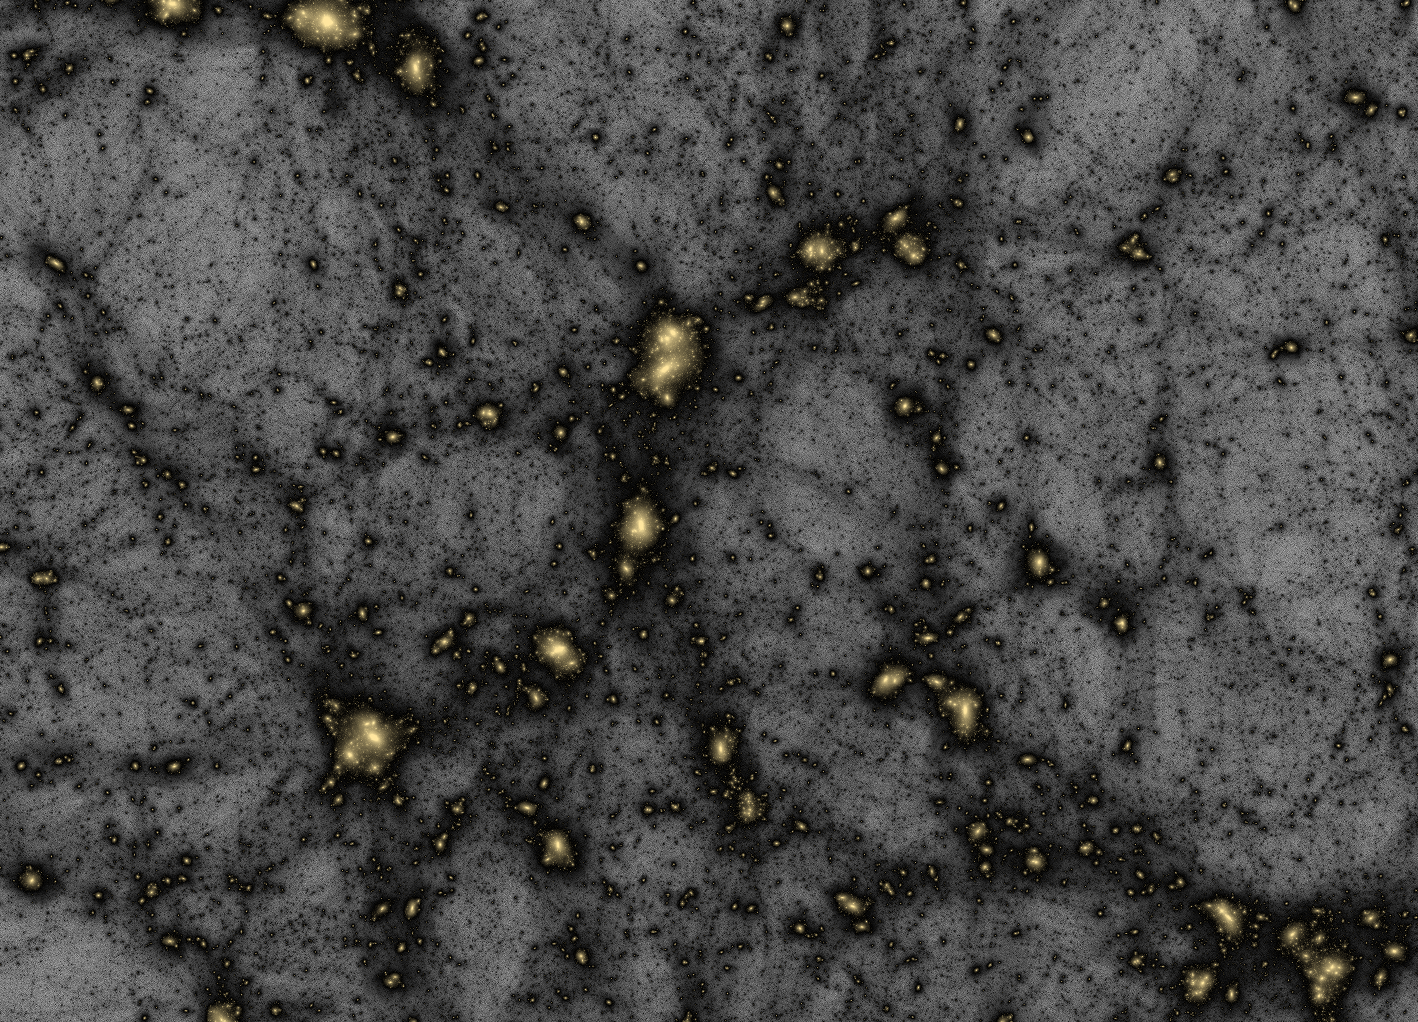

In [40]:
Image('darksky.png', width=400)

### Summary
The audacious, longterm goal of our research is to map out the large scale structure of the universe. Specifically we are interested in resolving dark matter, a key contributor that can only be measured indirectly through its gravitional influence on nearby galaxies. We insert synthetic galaxies into a large box of space filled with dark matter halos from simulations. Then we compute the likelihood of a particular dark matter halo mass allocation by measuring the observed shear of the galaxies and comparing this to the results from ray tracing. By sampling various mass allocations and weighting them by the likelihood we produce a posterior mass distribution for each dark matter halo.

Today we are confirming the validity of this approach with simulated data, and in the future we look forward to using our framework to resolve dark matter structures in real surveys. There is also significant potential for inferring galaxy formation and cosmology parameters that would be of high value to the broader astrophysics community.

### Previous Work
This project builds on the work done in the original 'Pangloss' paper, [Reconstructing the Lensing Mass in the Universe from Photometric Catalogue Data](https://arxiv.org/abs/1303.6564), and [Spencer Everett's thesis](https://github.com/drphilmarshall/Pangloss/wiki).

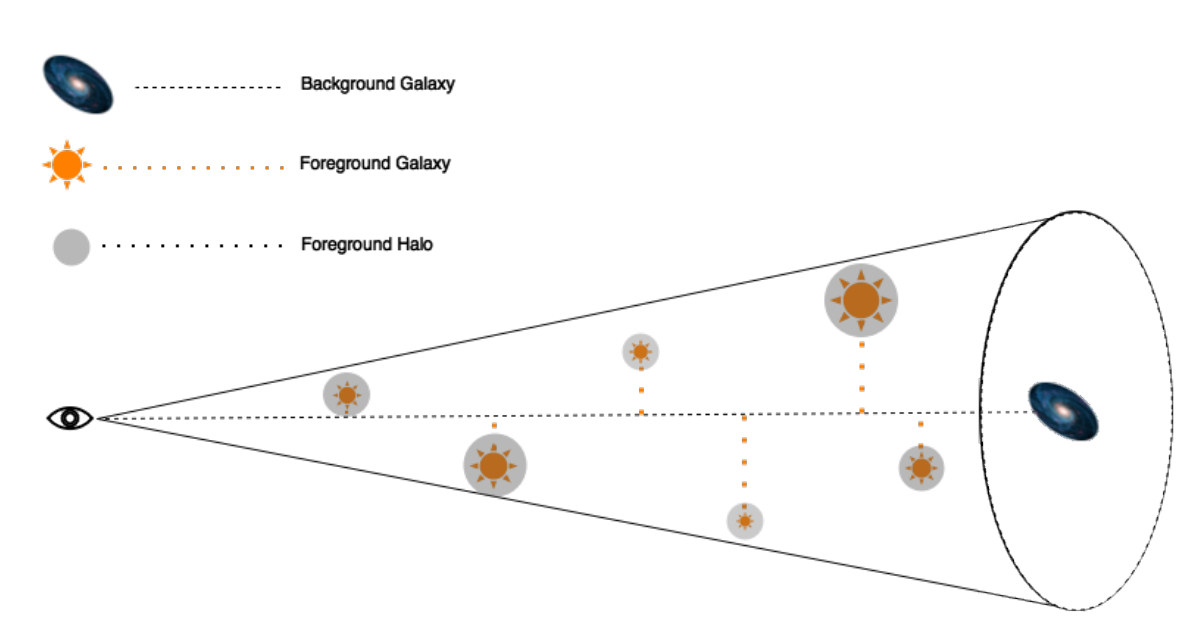

In [38]:
Image('lightcone.png', width=400)

The core idea of the framework
1. Generate synthetic sources like the 'Background Galaxy' above. 
2. Draw dark matter halo masses for the 'Foreground Halos'.
3. For each source, build a lightcone from the hypothetic observer to the source.
4. Compute the shear from the gravitational lensing.
5. Compute the log-likelihood by comparing the predicted shear to the ray traced shear (from [Hilbert et al 2009](https://arxiv.org/abs/0809.5035)).

# Inference

### PGM

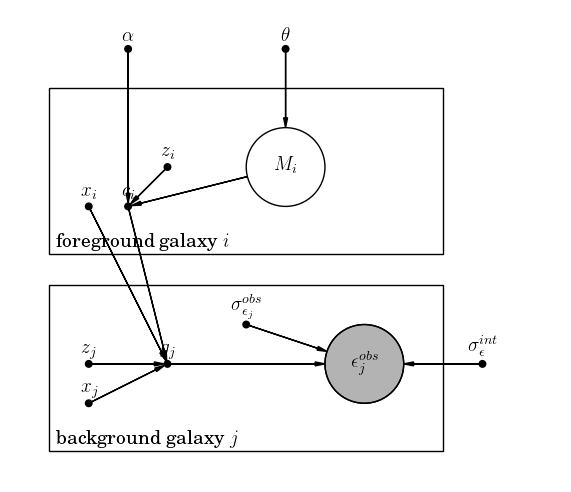

In [37]:
Image('simple_mc_pgm.png', width=400) 

We have sets of foregrounds and backgrounds (may refer to them as 'halos' and 'sources' in the future) along with the variables

- $\alpha$:  parameters in the concentration function (which is a function of $z_i,M_i$)
- $\theta$: prior distribution of halo masses
- $z_i$: foreground galaxy redshift
- $x_i$: foreground galaxy angular coordinates
- $z_j$: background galaxy redshift
- $x_j$: background galaxy angular coordinates
- $g_j$: reduced shear
- $\sigma_{\epsilon_j}^{obs}$: noise from our ellipticity measurement process
- $\sigma_{\epsilon}^{int}$: intrinsic variance in ellipticities
- $\epsilon_j^{obs}$: observed ellipticity

### Likelihood Function
The likelihood of a set of parameter values, θ, given outcomes x, is equal to the probability of those observed outcomes given those parameter values, that is

$$\mathcal{L}(\theta |x) = P(x | \theta)$$

In this context, under the assumption that errors are independent and exhibit a Gaussian distribution, the log-likelihood is 

$$\ln(\mathcal{L}) = -N\ln(2\pi\sigma) - \frac{1}{2}\sum^N_{i=1}\sum_{j=1}^2\Big(\frac{(\epsilon_{i,j} - g_{i,j})^2}{\sigma^2}\Big)$$

where $N$ is the number of samples, $\sigma = \sqrt{\sigma_{obs}^2+\sigma_{int}^2}$, $\epsilon_{i,j}$ is the ellipticity of the ith source, jth component, $g_{i,j}$ is the reduced shear of the ith source, jth component. Each iteration of our inference computes a log-likelihood and uses this to weight the sampled dark matter halo vector and build a posterior for each dark matter halo.

### Posterior Results

The old Pangloss is a bit slow so we use a stellar mass cutoff so that their is approximately one halo per square arcmin. This speeds up the computation and produces results that are easier to interpret.

- [SMHM](GroupMeeting_11_16.ipynb)
- [Pangloss Inference](PanglossInference.ipynb)


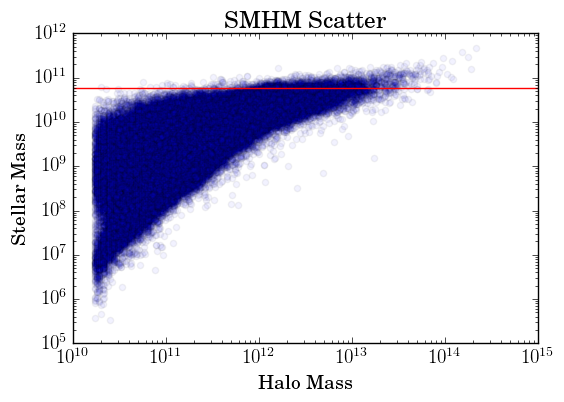

In [44]:
Image('smhm.png', width=400)

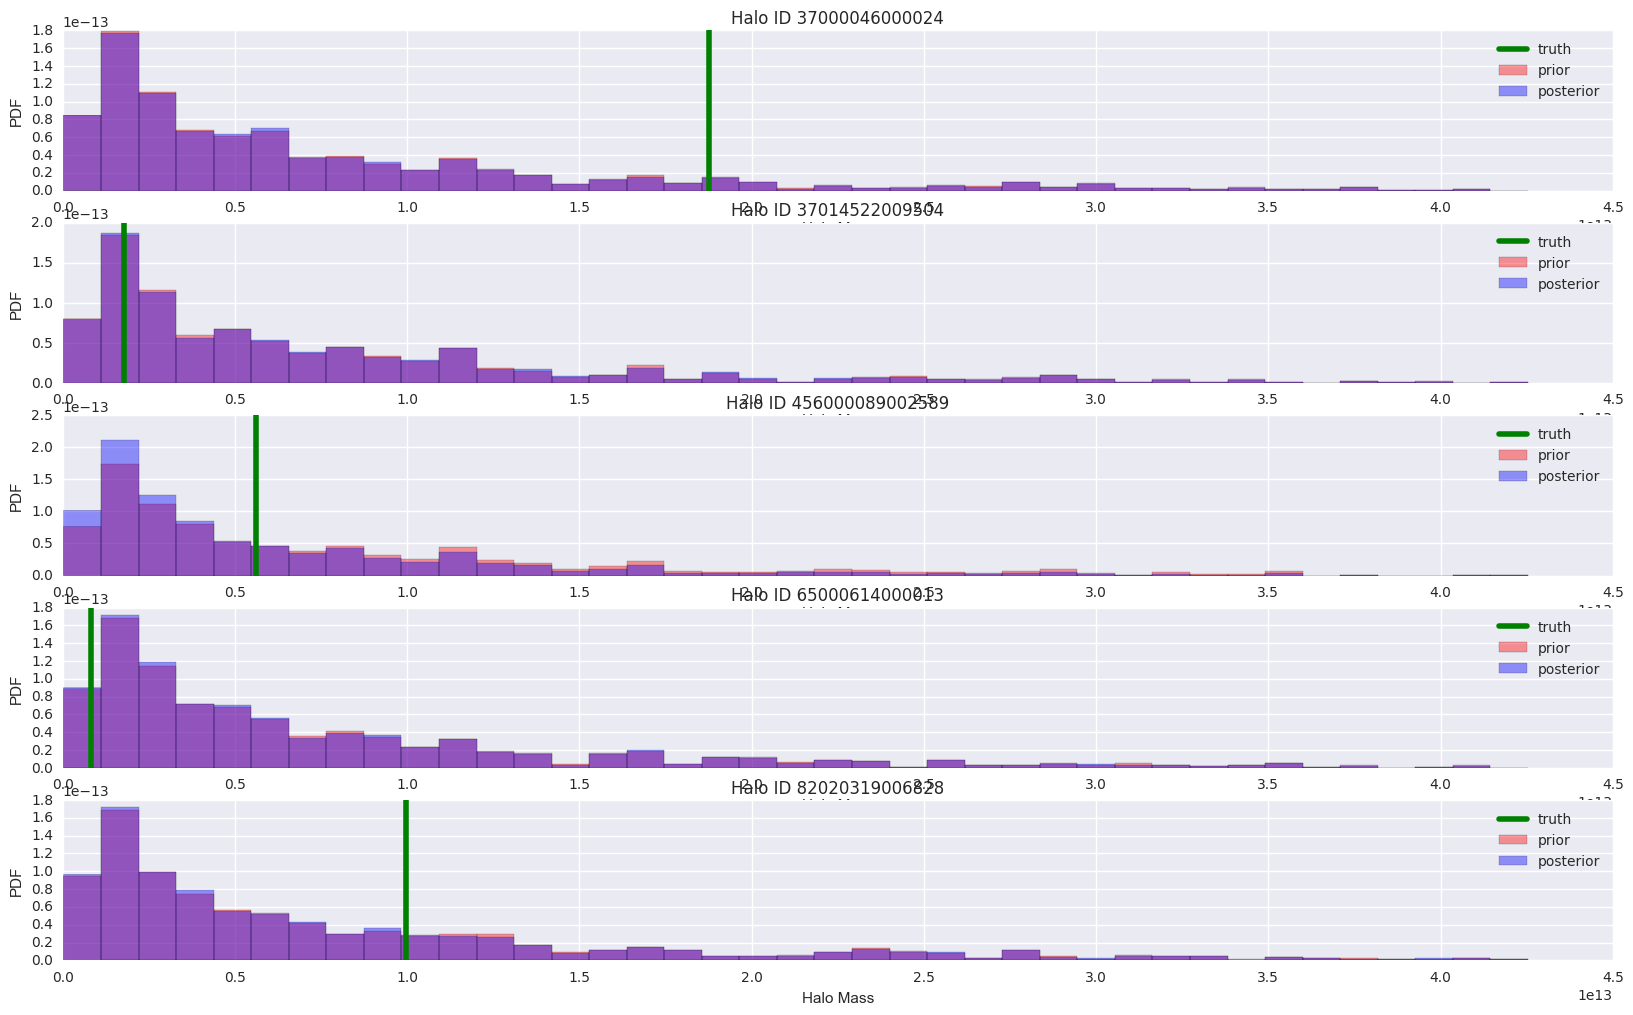

In [43]:
Image('pangloss_inference_1.png', width=1000)

# Mass Inference Prototype
### Changes
- Lean
    - All the notebooks, documents, legacy and prototype code made it tough to iterate quickly. The new, leaner module will allow us to move ahead at a much faster pace.

- Fast
    - Latest speed test suggests ~290x speedup, see [Benchmark](MassInferencePanglossPerformance.ipynb).
    - Structure is favorable for future order of magnitude latency reductions - run on cluster, further caching, further vectorization in lensing operations, lensing on gpu ...

- Reproducible
    - Uses random seeds to ensure reproducible sampling.
    - Eventually will have json config that stores python version, git version, arguments, etc that gets stored with results. Clients will be able to rerun previous experiments off of the configs.

- Tested
    - Python unittest tests.
    - Coveralls for test coverage.
    - Travisci for build testing.
    - Numpy docstrings and PEP8 guidelines.

- Modular
    - Separate functionality to make it easier to swap components in and out in the future. 
        - We should only have to change one class to run it over cluster with mpi4py, as opposed to restructuring lots of the code etc.
        - Same thing for mcmc, importance sampling, optimization ...
        
- Robust
    - New objects for angles, limits, plotting config
    - Fixed plotting
    - Distributions
    - Data is immutable
    - Factory pattern
    - More 'strongly typed'
    - Data downloads itself and 'just works'

### Same Inference

- [Sanity Check](MassInferencePanglossSameResult.ipynb)

### Better Performance

- Latest test suggests ~290x speedup
- [Latency](MassInferencePanglossPerformance.ipynb)
- [Call Structure](MassInferencePanglossPerformance.ipynb)

Below we have the call structures for Pangloss and MassInference. The MassInference call structure has been widled down to sequences of numpy operations. It also eliminates some duplication that existed in Pangloss.

Pangloss Call Structure


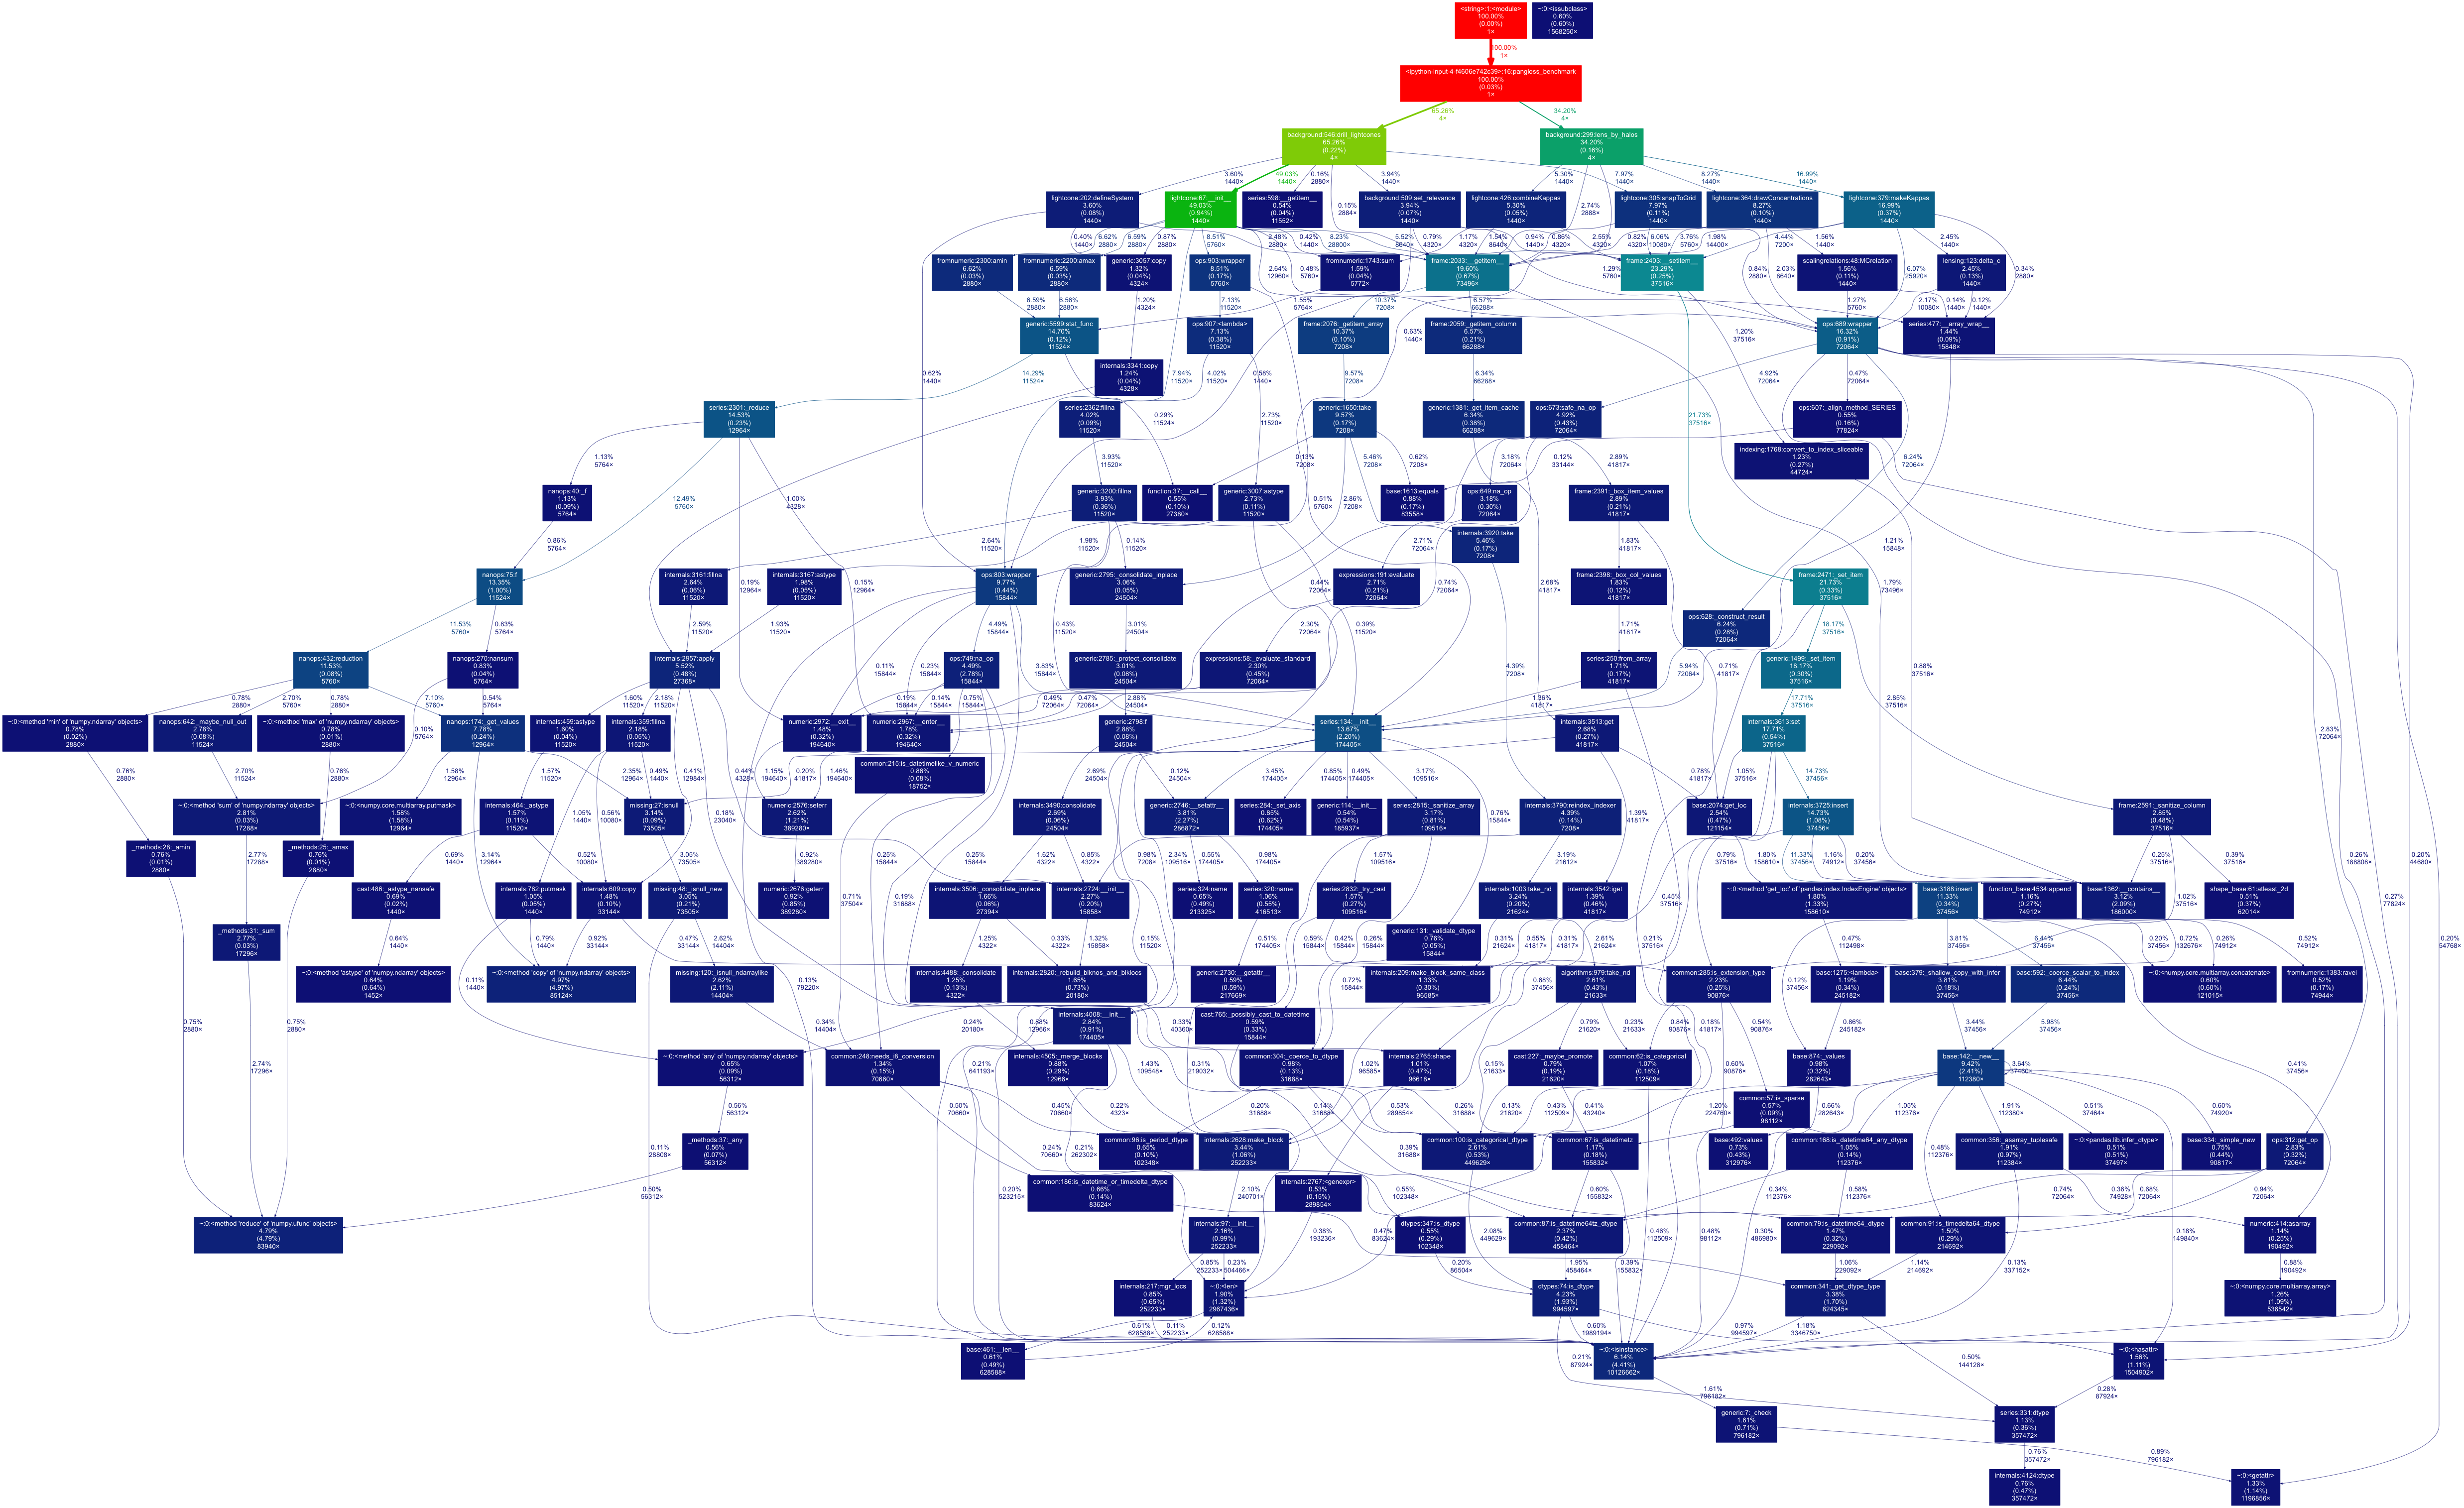

In [51]:
print 'Pangloss Call Structure'
Image('/Users/user/Desktop/pang_prof.png', width=1000)

MassInference Call Structure


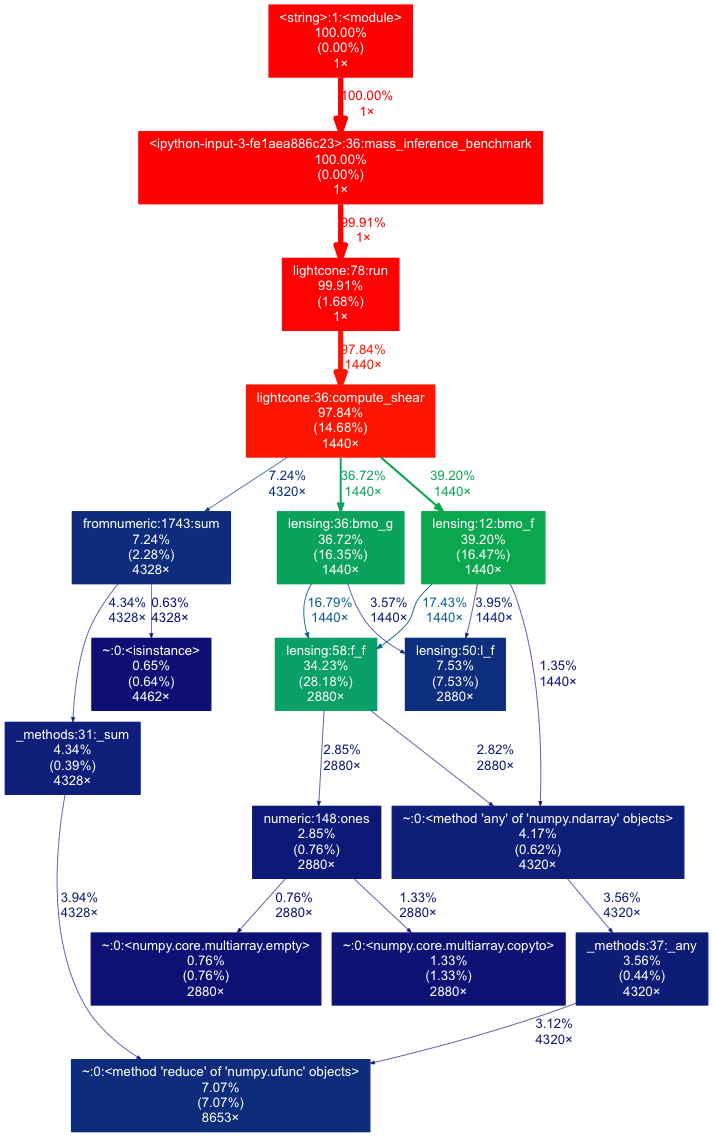

In [50]:
print 'MassInference Call Structure'
Image('/Users/user/Desktop/mi_prof.png', width=400)

# Next Steps
- Finish documentation and test suite
- Cache/vectorize lensing computation
- Confirm we are not losing any digits of precision when dealing with $10^{15}$ masses, potentially move to logscale
- Build lightcone manager that exploits mpi4py
- Variance Reduction - Importance Sampling, ...
- Sampling - MCMC, HMC, ...
- Optimization - MLE, ...

...

- Read papers
- Publish papers
- Present results at conference

# Thank You
Thanks to Professor Wechsler, the supportive galaxy formation and cosmology group, and the great mentor Dr. Phil Marshall for making this opportunity possible. I have been impressed by how accessible Phil is across multiple communication channels (email, slack, github, google docs) and inspired by his interest in and appreciation for computational science.